In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ns = [10, 100, 1000]
ps = [0.01, 0.05, 0.1, 0.2]
tests = 100
alpha = [1, 0.75, 0.5, 0.25]
markers = ['+', '^', 'o', 'x']

In [3]:
results = []

for n in ns:
    results.append(np.load('dim/result{}.npy'.format(n)))

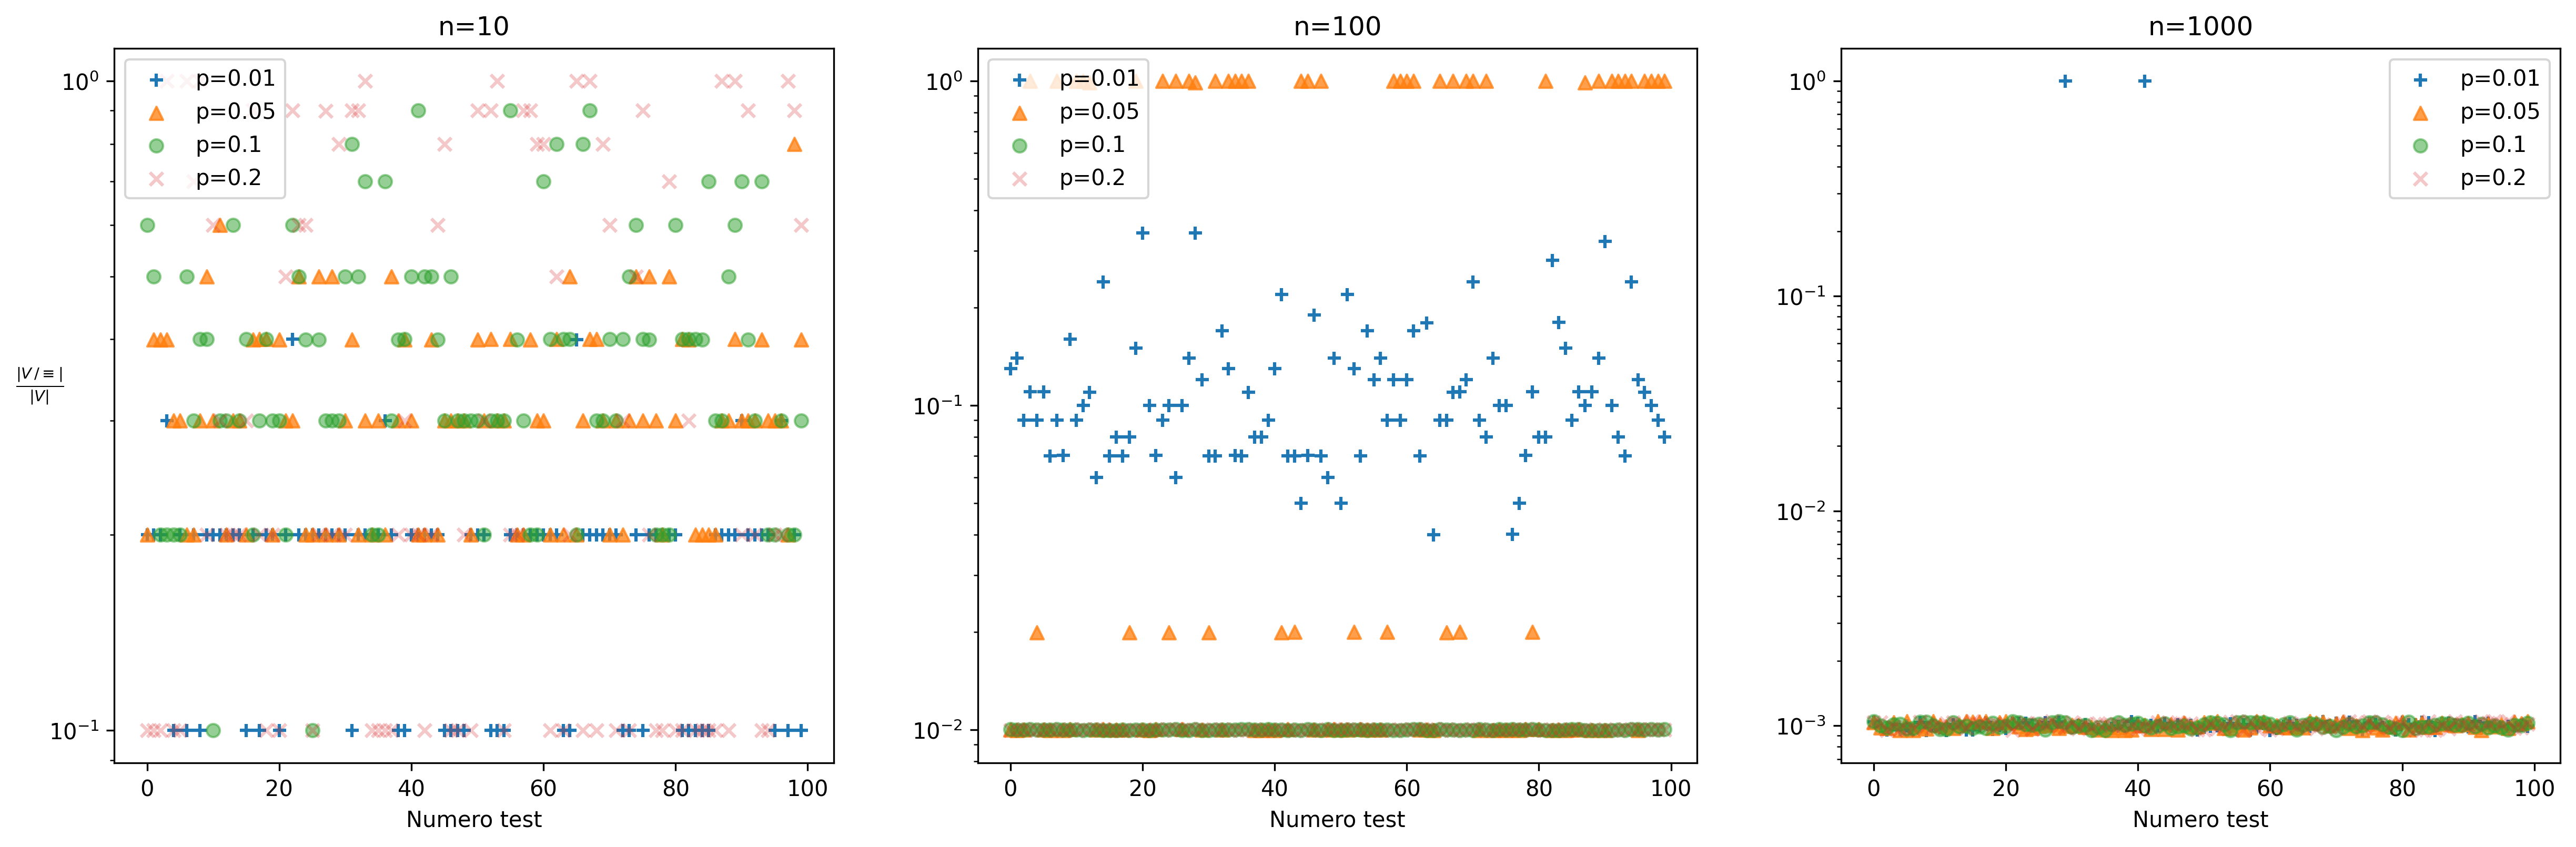

In [18]:
plt.figure(figsize=(20,6), dpi=300)

for n_idx, n in enumerate(ns):
    plt.subplot(1,3,n_idx+1)
    
    for p_idx, p in enumerate(ps):
        toplot = results[n_idx][p_idx][:tests] / n + (np.random.rand((tests)) - 0.5) * 0.0001
        
        plt.scatter(range(tests), toplot, label='p={}'.format(p), marker=markers[p_idx], 
                    alpha=alpha[p_idx])
        
    titles = ['a', 'b', 'c', 'd']
    x = np.full((tests*len(ps),3), None, dtype=object)
    for p_idx, p in enumerate(ps):
        x[p_idx*tests:(p_idx+1)*tests,0] = np.array(list(range(tests)))
        x[p_idx*tests:(p_idx+1)*tests,1] = results[n_idx][p_idx][:tests] / n
        x[p_idx*tests:(p_idx+1)*tests,2] = titles[p_idx]
        
    x = np.vstack([np.array(['x', 'y', 'label'])[None,:], x])
    np.savetxt('dim/result{}.txt'.format(n), x, fmt="%s")
    
    plt.title('n={}'.format(n))
    plt.yscale('log')
    
    plt.xlabel('Numero test')
    if n_idx == 0:
        yl = plt.ylabel('$\\frac{|V \, / \equiv|}{|V|}$')
        yl.set_rotation(0)
    
    plt.legend()
plt.show()